# Decision Trees and Random Forests - Terrorism in Europe 1970-2016

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2016. It includes systematic data on terrorist incidents that have occurred during this time period and now includes more than 170,000 cases = rows of data. 

This analysis focuses on terrorist attacks in Europe during this 46-year period, which includes over 21.000 incidents = rows of data. Each incident in the GTD is described with almost 50 different variables. The data includes both numerical and categorical data. <br><br>
One of the binomial variables is whether an attack has been succedful or not. The GTD Codebook  https://www.start.umd.edu/gtd/downloads/Codebook.pdf  defines this variable as follows:<br><br>
*Success of a terrorist strike is defined according to the tangible effects of the attack. Success is not judged in terms of the larger goals of the perpetrators. For example, a bomb that exploded in a building would be counted as a success even if it did not succeed in bringing the building down or inducing government repression. The definition of a successful attack depends on the type of attack. Essentially, the key question is whether or not the attack type took place. If a case has multiple
attack types, it is successful if any of the attack types are successful, with the exception of assassinations, which are only successful if the intended target is killed.<br>
1 = "Yes" The incident was successful.<br>
0 = "No" The incident was not successful.*<br><br>

This analysis aims to find a model, using the available variables, for predicting the succefulness of terrorist attacks in Europe. The methods used are Decision Trees and Random Forests.<br><br>
The steps are the following
- Downloading and shaping the data and viewing it from various angles
- Creating a Train and Test set
- Presenting the Performance Measures for the models
- Creating two Decision Trees models; a simple and a more complex one
- Creating a Random Forest model
- Checking for Feature Importance 
- Implementing the model
- Conclusions

In [43]:
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import seaborn as sns #remove?
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.externals.six import StringIO  
import pydotplus
from sklearn.ensemble import RandomForestClassifier

### Downloading, cleaning and shaping
We start by downloading the data and choosing the variables. There are many reasons why only about half of the available variables are chosen. For example, <br>
- The variables may have been strings, like name of the city or the perpetrator group name (70+ entries) making them difficult to categorize.<br>
- There were too many missing values for a variable and replacing them artificially might have distorted the results, so they were left out. For example, *'number of perpetrators'*; too many were unknown.


In [44]:
input_file = "C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/data_sets/Global Terrorism Database/globalterrorismdb_shorter.csv"

df = pd.read_csv(input_file, header = 0,usecols=['iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt', 
                                                 'region', 'latitude', 'longitude','success', 'suicide','attacktype1', 
                                                 'attacktype1_txt', 'targtype1', 'targtype1_txt', 'natlty1','natlty1_txt',
                                                 'weaptype1', 'weaptype1_txt' ,'nkill','multiple', 'individual', 
                                                 'claimed','nkill','nkillter', 'nwound', 'nwoundte'])
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Data columns (total 26 columns):
iyear              170350 non-null int64
imonth             170350 non-null int64
iday               170350 non-null int64
extended           170350 non-null int64
country            170350 non-null int64
country_txt        170350 non-null object
region             170350 non-null int64
latitude           165744 non-null float64
longitude          165744 non-null float64
multiple           170350 non-null int64
success            170350 non-null int64
suicide            170350 non-null int64
attacktype1        170350 non-null int64
attacktype1_txt    170350 non-null object
targtype1          170350 non-null int64
targtype1_txt      170350 non-null object
natlty1            168956 non-null float64
natlty1_txt        168956 non-null object
individual         170350 non-null int64
claimed            104216 non-null float64
weaptype1          170350 non-null int64
weaptype1_txt   

#### Some of the variables explained:
- **extended**: The duration of an incident extended more than 24 hours (1) - Less than 24 hours (0).
- **multiple**: The attack is part of a multiple incident (1) - Not part of a multiple incident (0).
- **suicide**: The incident was a suicide attack (1) - There is no indication of a suicide attack (0).
- **attacktype**: Assassination(1), Hijacking(2), Kidnapping(3), Barricade Incident(4), Bombing/Explosion(5), Armed Assault(6), Unarmed Assault(7), Facility/Infrastructure Attack(8), Unknown(9)
- **targtype**: 22 categories ranging from Business(1), Government(general)(2), Police(3),...Utilities(21), Violent Political Parties(22)
- **natlty**: Nationality of target/victim
- **individual**: Whether the attack was carried out by an individual or several individuals known to be affiliated with a group or organization(1) or not affiliated with a group or organization(0)
- **claimed**: A group or person claimed responsibility for the attack (1) - No claim of responsibility was made(0).
- **weaptype**: 13 categories ranging from Biological(1), Chemical(2), Radiological(3),...Other(12), Unknown(13)
- **nkill**: Total number of fatalities including  all victims and attackers who died as a direct result of the incident.
- **nkillter**:  Limited to only perpetrator fatalities
- **nwound**:  Total number of injured victims and attackers
- **nwoundte**: Total number of injured perpetrators <br><br>
 Next, we narrow the data down to incidents occured only in Europe and check how the data looks like:<br>

In [45]:
df_WEur= df[df.region == 8] # A dataframe with region Western Europe
df_EEur= df[df.region ==9] # A dataframe with region Eastern Europe

euro_frames = [df_WEur, df_EEur]
df_Euro = pd.concat(euro_frames) # # A dataframe with whole Europe, both Western & Eastern  
df_Euro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21338 entries, 3 to 170268
Data columns (total 26 columns):
iyear              21338 non-null int64
imonth             21338 non-null int64
iday               21338 non-null int64
extended           21338 non-null int64
country            21338 non-null int64
country_txt        21338 non-null object
region             21338 non-null int64
latitude           21154 non-null float64
longitude          21154 non-null float64
multiple           21338 non-null int64
success            21338 non-null int64
suicide            21338 non-null int64
attacktype1        21338 non-null int64
attacktype1_txt    21338 non-null object
targtype1          21338 non-null int64
targtype1_txt      21338 non-null object
natlty1            21113 non-null float64
natlty1_txt        21113 non-null object
individual         21338 non-null int64
claimed            7426 non-null float64
weaptype1          21338 non-null int64
weaptype1_txt      21338 non-null objec

We get rid of some of the variables: <br>
- **claimed, nkillter, nwound, nwoundte** - too many of the values are missing and replacing them artificially would be misleading.<br><br>
Also, we don't need the variable **region** anymore since all are within Europe.


In [46]:
df_Europe = df_Euro.drop([ 'region', 'claimed', 'nkillter', 'nwound','nwoundte'], axis=1)  
df_Europe.head()

,iyear,imonth,iday,extended,country,country_txt,latitude,longitude,multiple,success,...,attacktype1,attacktype1_txt,targtype1,targtype1_txt,natlty1,natlty1_txt,individual,weaptype1,weaptype1_txt,nkill
3,1970,1,0,0,78,Greece,37.983773,23.728157,0,1,...,3,Bombing/Explosion,7,Government (Diplomatic),217.0,United States,0,6,Explosives/Bombs/Dynamite,NaN
12,1970,1,8,0,98,Italy,41.890520,12.494249,0,1,...,4,Hijacking,6,Airports & Aircraft,217.0,United States,0,5,Firearms,0.0
59,1970,2,10,0,362,West Germany (FRG),48.139126,11.580186,0,1,...,2,Armed Assault,6,Airports & Aircraft,97.0,Israel,0,5,Firearms,1.0
62,1970,2,13,0,362,West Germany (FRG),48.139126,11.580186,0,1,...,7,Facility/Infrastructure Attack,14,Private Citizens & Property,75.0,Germany,0,8,Incendiary,7.0
79,1970,2,21,0,362,West Germany (FRG),50.111445,8.680615,0,1,...,3,Bombing/Explosion,6,Airports & Aircraft,15.0,Austria,0,6,Explosives/Bombs/Dynamite,0.0


We are now down to mostly integers and floats.

In [47]:
df_Europe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21338 entries, 3 to 170268
Data columns (total 21 columns):
iyear              21338 non-null int64
imonth             21338 non-null int64
iday               21338 non-null int64
extended           21338 non-null int64
country            21338 non-null int64
country_txt        21338 non-null object
latitude           21154 non-null float64
longitude          21154 non-null float64
multiple           21338 non-null int64
success            21338 non-null int64
suicide            21338 non-null int64
attacktype1        21338 non-null int64
attacktype1_txt    21338 non-null object
targtype1          21338 non-null int64
targtype1_txt      21338 non-null object
natlty1            21113 non-null float64
natlty1_txt        21113 non-null object
individual         21338 non-null int64
weaptype1          21338 non-null int64
weaptype1_txt      21338 non-null object
nkill              20258 non-null float64
dtypes: float64(4), int64(12), object

Next, let's look at a summary of the numerical variables.

In [48]:
df_Europe.describe() 

,iyear,imonth,iday,extended,country,latitude,longitude,multiple,success,suicide,attacktype1,targtype1,natlty1,individual,weaptype1,nkill
count,21338.000000,21338.000000,21338.000000,21338.000000,21338.000000,21154.000000,21154.000000,21338.000000,21338.000000,21338.000000,21338.000000,21338.000000,21113.000000,21338.000000,21338.000000,20258.000000
mean,1992.940575,6.430078,15.340941,0.016075,260.284516,47.004651,10.921231,0.122458,0.856125,0.004968,3.300684,6.858609,167.954530,0.004452,6.471366,0.686445
std,13.505148,3.425984,8.848828,0.125765,219.288339,5.812682,17.854881,0.327821,0.350971,0.070308,1.949289,6.274039,90.410236,0.066577,1.847327,5.442190
min,1970.000000,0.000000,0.000000,0.000000,5.000000,27.793520,-27.220577,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,1981.000000,3.000000,8.000000,0.000000,78.000000,42.672479,-3.700345,0.000000,1.000000,0.000000,2.000000,2.000000,97.000000,0.000000,6.000000,0.000000
50%,1991.000000,6.000000,15.000000,0.000000,185.000000,45.463681,7.686619,0.000000,1.000000,0.000000,3.000000,4.000000,185.000000,0.000000,6.000000,0.000000
75%,2004.000000,9.000000,23.000000,0.000000,499.000000,53.383067,22.944616,0.000000,1.000000,0.000000,3.000000,14.000000,216.000000,0.000000,6.000000,1.000000
max,2016.000000,12.000000,31.000000,1.000000,1003.000000,74.633553,158.383333,1.000000,1.000000,1.000000,9.000000,22.000000,1003.000000,1.000000,13.000000,344.000000



### The anatomy of an attack - a statistical average
Finally, having the European data in one data frame we can take a closer look at it. For example, what have, then,  been the characteristics of an *average attack* in Europe between 1970-2016?


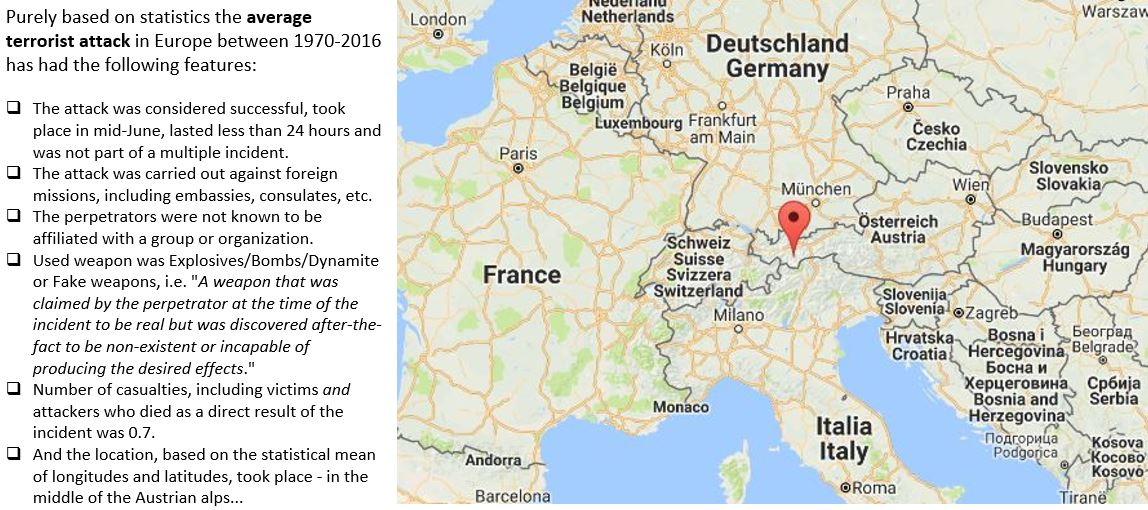

In [49]:
Image("C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/data_sets/Global Terrorism Database/AverageLocation.jpg")

It's apparent that historical averages do not give a very realistic prediction, especially for the location of an attack!

From the rough geographical sketch plotting all the incidents, we can see that Western Europe as the scene dominates clearly.

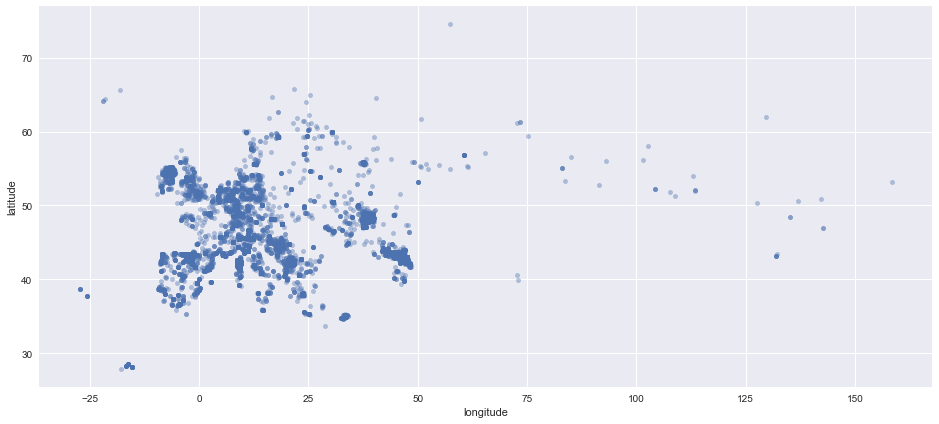

In [50]:
df_Europe.plot(kind= 'scatter', x='longitude', y='latitude', alpha=0.4, figsize=(16,7))
plt.show()

As for the number of casualties over the years the Balkans and Ukraine have been the most violent areas, closely followed by Northern Ireland.

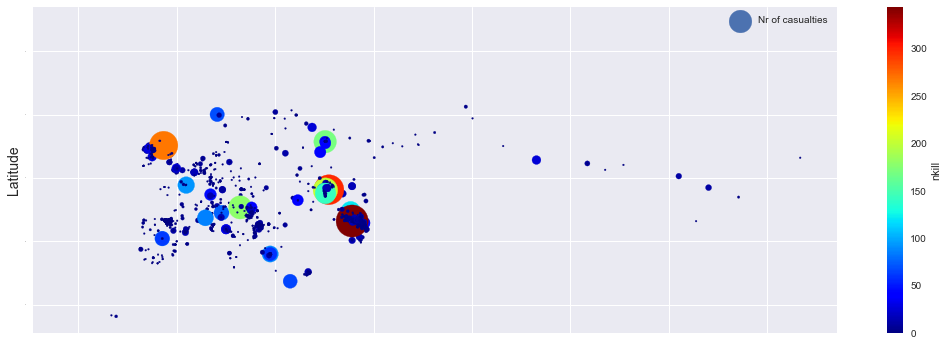

In [51]:
df_Europe.plot(kind= 'scatter', x='longitude', y='latitude', alpha=1.0,  figsize=(18,6),  
               s=df_Europe['nkill']*3, label= 'Nr of casualties', fontsize=1, c='nkill', cmap=plt.get_cmap("jet"), colorbar=True)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

There were still NaN's in some of the variables. We use the means of the available values to replace them :<br>
- **nkill** = 	0.686445<br>
- **latitude** = 47.004651
- **longitude** = 10.921231
- **natlty1** = 167.954530

In [52]:
df_Europe['nkill'].fillna(0.686445, inplace=True)
df_Europe['latitude'].fillna(47.004651, inplace=True)
df_Europe['longitude'].fillna(10.921231, inplace=True)
df_Europe['natlty1'].fillna(167.954530, inplace=True)

df_Europe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21338 entries, 3 to 170268
Data columns (total 21 columns):
iyear              21338 non-null int64
imonth             21338 non-null int64
iday               21338 non-null int64
extended           21338 non-null int64
country            21338 non-null int64
country_txt        21338 non-null object
latitude           21338 non-null float64
longitude          21338 non-null float64
multiple           21338 non-null int64
success            21338 non-null int64
suicide            21338 non-null int64
attacktype1        21338 non-null int64
attacktype1_txt    21338 non-null object
targtype1          21338 non-null int64
targtype1_txt      21338 non-null object
natlty1            21338 non-null float64
natlty1_txt        21113 non-null object
individual         21338 non-null int64
weaptype1          21338 non-null int64
weaptype1_txt      21338 non-null object
nkill              21338 non-null float64
dtypes: float64(4), int64(12), object

We now have a complete set of data. There are still 25 entries missing from nationalities (**natlty1_text**) but since it's a string variable and will not be used in calculations we decide to ignore this. <br><br>
Next, we start visualizing the data.  <br><br>
From the summary of the numerical attributes we can see that the mean for **success** is 0.856; i.e. the terror attacks in Europe have on average - unfortunately - been succesful in c. 17 cases out of 20. This high success rate is also visible in the charts.

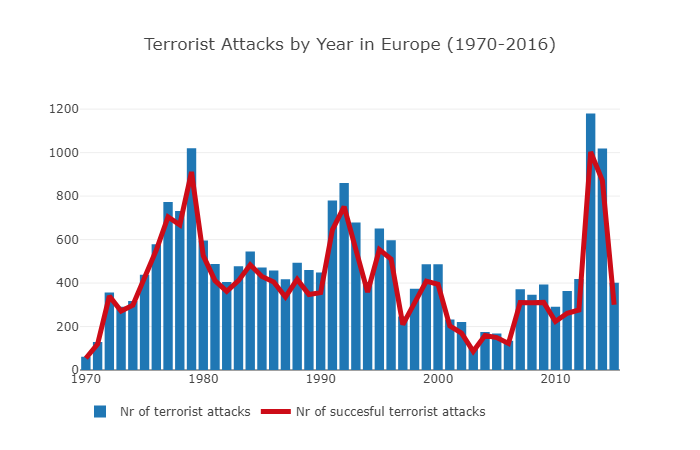

In [75]:
terror_peryear = np.asarray(df_Europe.groupby('iyear').iyear.count())
successes_peryear = np.asarray(df_Europe.groupby('iyear').success.sum())
                
terror_years = np.arange(1970, 2016)

trace1 = go.Bar(x = terror_years, y = terror_peryear, name = 'Nr of terrorist attacks',
         width = dict(color = 'rgb(118,238,198)', width = 3))

trace2 = go.Scatter(x = terror_years, y = successes_peryear, name = 'Nr of succesful terrorist attacks',
         line = dict(color = ('rgb(205, 12, 24)'), width = 5,))

layout = go.Layout(title = 'Terrorist Attacks by Year in Europe (1970-2016)', legend=dict(orientation="h"),
         barmode = 'group')

figure = dict(data = [trace1,trace2], layout = layout)
#iplot(figure)
Image("C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/data_sets/Global Terrorism Database/Charts/AttacksByYear.png")

The most active terrorist groups in the peak years have been
- **1979:** **France:** Corsican National Liberation Front (FLNC), **Spain:** Basque Fatherland and Freedom (ETA), **U.K.:** Irish Republican Army (IRA)
- **1992:** The three above plus **Germany:** Neo-Nazi extremists
- **2013-14:** Mainly unknown perpetrators in Russia and eastern Ukraine <br><br>
The following bar charts show the number of attacks per country in total and the share of those that were succesful.<br> **Please note!** The Top 10 is plotted in a separate graph due to their overweigth in the overall statistics. This way the "below Top 10" chart becomes more readable.

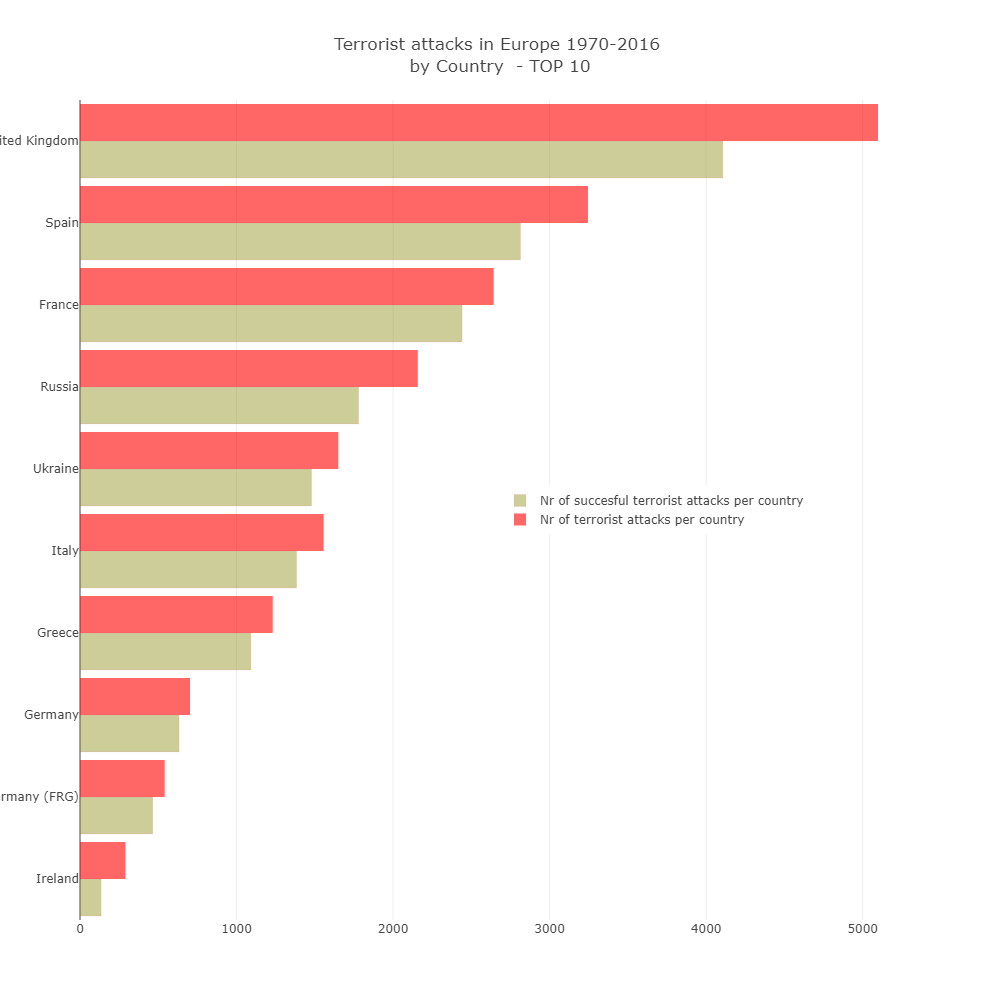

In [78]:
attacks_per_country = (df_Europe.groupby('country_txt').country_txt.count()) 
successes_per_country = (df_Europe.groupby('country_txt').success.sum()) 

trace1 = go.Bar(y=['Ireland','West Germany (FRG)','Germany','Greece','Italy','Ukraine','Russia','France','Spain','United Kingdom'],
    x=[290,541,703,1231,1556,1650,2158,2642,3245,5098],
    name='Nr of terrorist attacks per country', orientation = 'h', 
    marker = dict(color = 'rgba(255,0,0, 0.6)', line = dict(color = 'rgba(0, 255,0,0, 0.)', width = 0.5)))

trace2 = go.Bar(y=['Ireland','West Germany (FRG)','Germany','Greece','Italy','Ukraine','Russia','France','Spain','United Kingdom'],
    x=[135,465,633,1092,1384,1479,1780,2441,2814,4107],
    name='Nr of succesful terrorist attacks per country', orientation = 'h',
    marker = dict(color = 'rgba(128,128,0, 0.4)', line = dict(color = 'rgba(246, 78, 139, 0.2)',width = 0.5)))

data = [trace2,trace1]
layout = go.Layout(
    legend=dict(x=0.5, y=0.5), # placing legend in the middle
    title = 'Terrorist attacks in Europe 1970-2016 <br>by Country  - TOP 10', barmode='group',
    bargap=0.1, 
    autosize=False,
    width=1000,
    height=1000)

fig = go.Figure(data=data, layout=layout)
#iplot(fig)
Image("C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/data_sets/Global Terrorism Database/Charts/Top10.png")

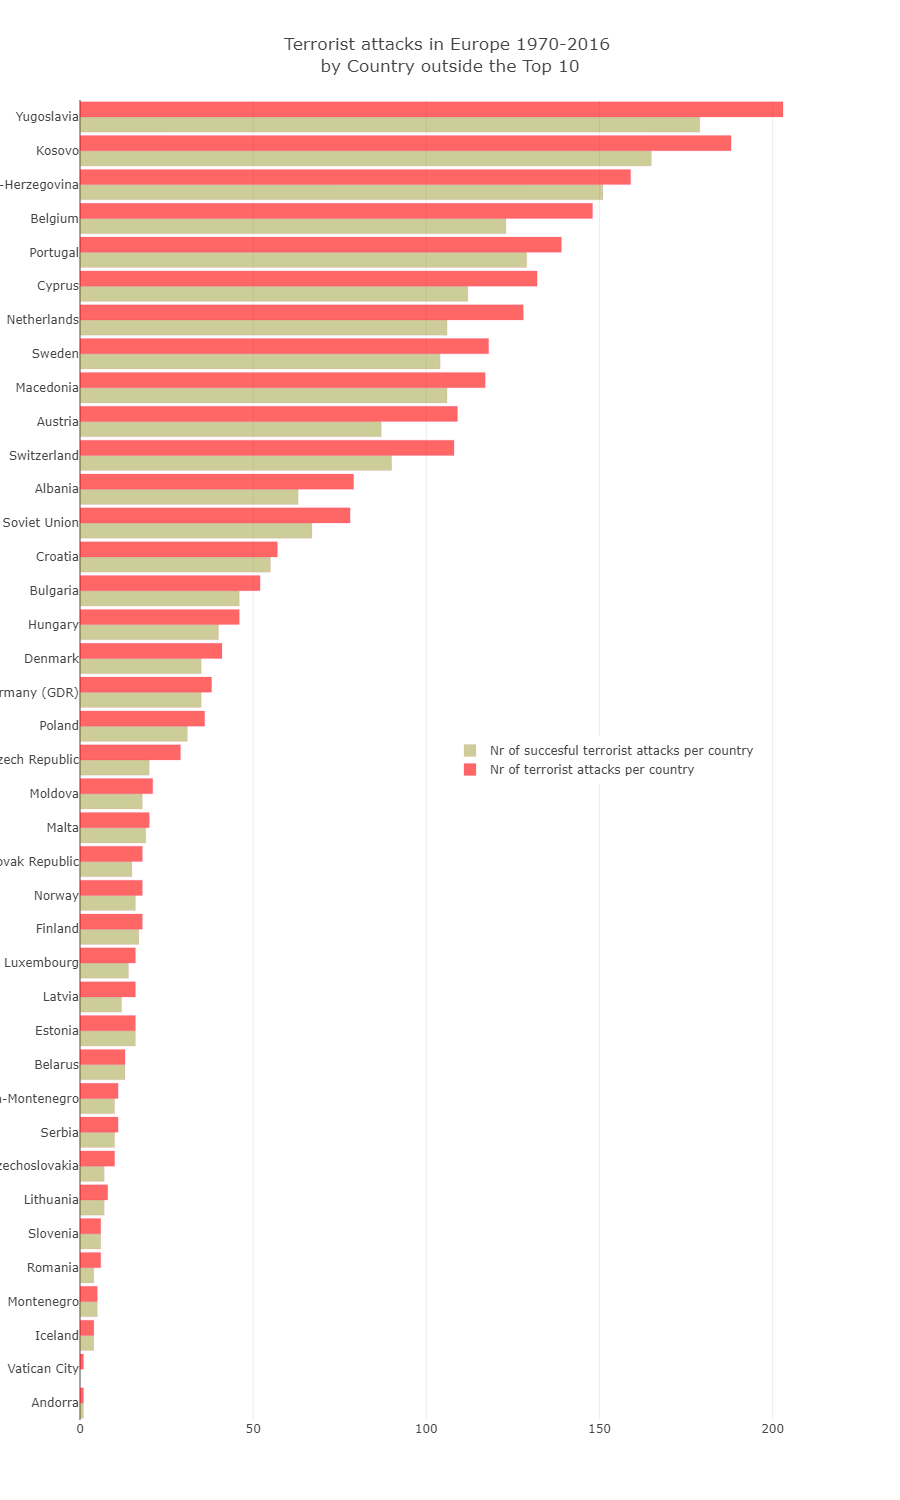

In [79]:
trace1 = go.Bar(
    y=['Andorra','Vatican City','Iceland','Montenegro','Romania','Slovenia','Lithuania','Czechoslovakia',
       'Serbia','Serbia-Montenegro','Belarus','Estonia','Latvia','Luxembourg','Finland','Norway','Slovak Republic',
       'Malta','Moldova','Czech Republic','Poland','East Germany (GDR)','Denmark','Hungary','Bulgaria','Croatia',
       'Soviet Union','Albania','Switzerland','Austria','Macedonia','Sweden','Netherlands','Cyprus','Portugal',
       'Belgium','Bosnia-Herzegovina','Kosovo','Yugoslavia'],
    x=[1,1,4,5,6,6,8,10,11,11,13,16,16,16,18,18,18,20,21,29,36,38,41,46,52,57,78,79,108,109,117,118,128,132,139,148,159,188,203],
    name='Nr of terrorist attacks per country',
    orientation = 'h',
    marker = dict(
        color = 'rgba(255,0,0, 0.6)',
        line = dict(
            color = 'rgba(246, 78, 139, 0.2)',
            width = 1)))

trace2 = go.Bar(
    y=['Andorra','Vatican City','Iceland','Montenegro','Romania','Slovenia','Lithuania','Czechoslovakia',
       'Serbia','Serbia-Montenegro','Belarus','Estonia','Latvia','Luxembourg','Finland','Norway','Slovak Republic',
       'Malta','Moldova','Czech Republic','Poland','East Germany (GDR)','Denmark','Hungary','Bulgaria','Croatia',
       'Soviet Union','Albania','Switzerland','Austria','Macedonia','Sweden','Netherlands','Cyprus','Portugal',
       'Belgium','Bosnia-Herzegovina','Kosovo','Yugoslavia'],
    x=[1,0,4,5,4,6,7,7,10,10,13,16,12,14,17,16,15,19,18,20,31,35,35,40,46,55,67,63,90,87,106,104,106,112,129,123,151,165,179],
    name='Nr of succesful terrorist attacks per country',
    orientation = 'h',
    marker = dict(
        color = 'rgba(128,128,0, 0.4)',
        line = dict(
            color = 'rgba(246, 78, 139, 0.2)',
            width = 0.5)))

data = [trace2, trace1]
layout = go.Layout(
    legend=dict(x=0.5, y=0.5), # placing legend in the middle
    title = 'Terrorist attacks in Europe 1970-2016 <br>by Country outside the Top 10',
    barmode='group',
    bargap=0.1,
    #bargroupgap=0.1,
    autosize=False,
    width=900,
    height=1500,
)

fig = go.Figure(data=data, layout=layout)
#iplot(fig)
Image("C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/data_sets/Global Terrorism Database/Charts/BelowTop10.png")

### Succesful attacks arranged by attack type
Next we look at the attacks by type seeing that Bombing/Explosion has by far been the dominating type. 

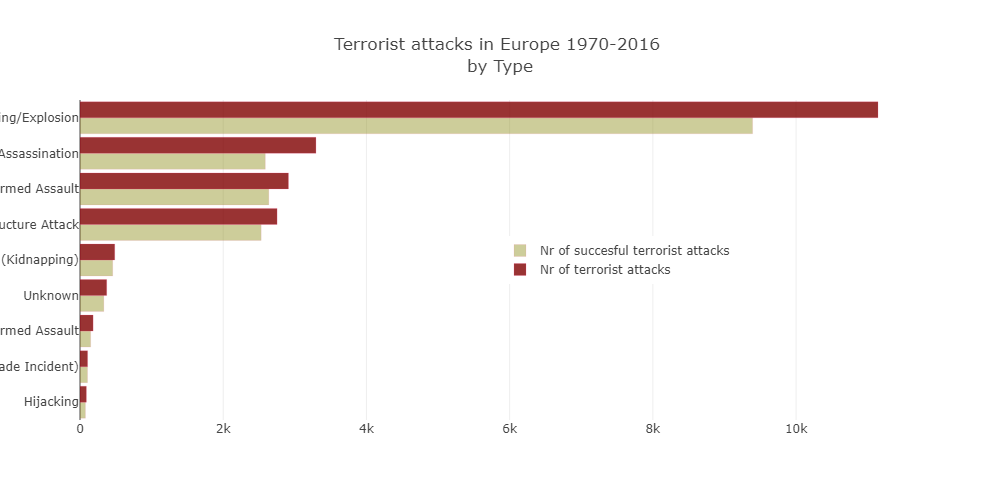

In [80]:
attacks_per_type = (df_Europe.groupby('attacktype1_txt').attacktype1_txt.count())
successes_per_type = (df_Europe.groupby('attacktype1_txt').success.sum())

trace2 = go.Bar(
    y=['Hijacking','Hostage Taking (Barricade Incident)','Unarmed Assault','Unknown','Hostage Taking (Kidnapping)','Facility/Infrastructure Attack','Armed Assault','Assassination','Bombing/Explosion'],
    x=[89,106,183,373,485,2752,2911,3295,11144],
    name='Nr of terrorist attacks',
    orientation = 'h',
    marker = dict(
        color = 'rgba(128,0,0, 0.8)',
        line = dict(
            color = 'rgba(246, 78, 139, 0.2)',
            width = 1)))

trace1 = go.Bar(
    y=['Hijacking','Hostage Taking (Barricade Incident)','Unarmed Assault','Unknown','Hostage Taking (Kidnapping)','Facility/Infrastructure Attack','Armed Assault','Assassination','Bombing/Explosion'],
    x=[76,105,149,333,457,2530,2637,2588,9393],
    name='Nr of succesful terrorist attacks',
    orientation = 'h',
    marker = dict(
        color = 'rgba(128,128,0, 0.4)',
        line = dict(
            color = 'rgba(246, 78, 139, 0.2)',
            width = 0.5)))

data = [trace1, trace2]
layout = go.Layout(
    legend=dict(x=0.5, y=0.5), # placing legend in the middle
    title = 'Terrorist attacks in Europe 1970-2016 <br>by Type',
    barmode='group',
    bargap=0.1,
    bargroupgap=0,
    autosize=False,
    width=1000,
    height=500,
)

fig = go.Figure(data=data, layout=layout)
#iplot(fig)
Image("C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/data_sets/Global Terrorism Database/Charts/AttacksByType.png")

Next a look at the variables' correlations, numerically and graphically.

In [57]:
df_Europe.corr()

,iyear,imonth,iday,extended,country,latitude,longitude,multiple,success,suicide,attacktype1,targtype1,natlty1,individual,weaptype1,nkill
iyear,1.000000,0.002778,0.015311,0.043746,-0.128478,-0.038912,0.542099,0.158517,-0.105931,0.078051,0.133067,0.097937,0.059402,0.080305,0.029032,0.023694
imonth,0.002778,1.000000,0.015381,-0.009084,-0.003485,0.008979,0.023277,-0.038132,0.003053,0.017786,-0.018782,-0.001880,0.016235,-0.007573,-0.013179,0.018142
iday,0.015311,0.015381,1.000000,0.004635,0.015010,0.021356,0.007043,-0.037287,0.000780,-0.000689,-0.018018,0.009205,0.026344,0.009118,0.000845,-0.002926
extended,0.043746,-0.009084,0.004635,1.000000,-0.039872,-0.018620,0.094192,-0.030696,0.043904,-0.003731,0.136090,-0.002465,0.007664,-0.002950,0.193116,0.058453
country,-0.128478,-0.003485,0.015010,-0.039872,1.000000,0.643017,-0.406630,-0.105403,-0.074921,-0.027648,-0.143400,0.091323,0.522905,-0.019027,-0.116328,0.008163
latitude,-0.038912,0.008979,0.021356,-0.018620,0.643017,1.000000,-0.322631,-0.103696,-0.076818,-0.012183,-0.011589,0.135340,0.299297,0.026133,-0.005765,0.016243
longitude,0.542099,0.023277,0.007043,0.094192,-0.406630,-0.322631,1.000000,0.050185,0.036871,0.104338,0.037796,-0.007547,-0.076771,-0.007836,0.000113,0.068080
multiple,0.158517,-0.038132,-0.037287,-0.030696,-0.105403,-0.103696,0.050185,1.000000,0.035416,0.028507,0.112456,-0.023733,-0.068072,-0.009950,0.063098,-0.002990
success,-0.105931,0.003053,0.000780,0.043904,-0.074921,-0.076818,0.036871,0.035416,1.000000,0.011872,0.083171,-0.059766,-0.039017,-0.004677,0.037812,0.044044
suicide,0.078051,0.017786,-0.000689,-0.003731,-0.027648,-0.012183,0.104338,0.028507,0.011872,1.000000,-0.013293,0.006905,-0.006851,0.025312,-0.017669,0.162195


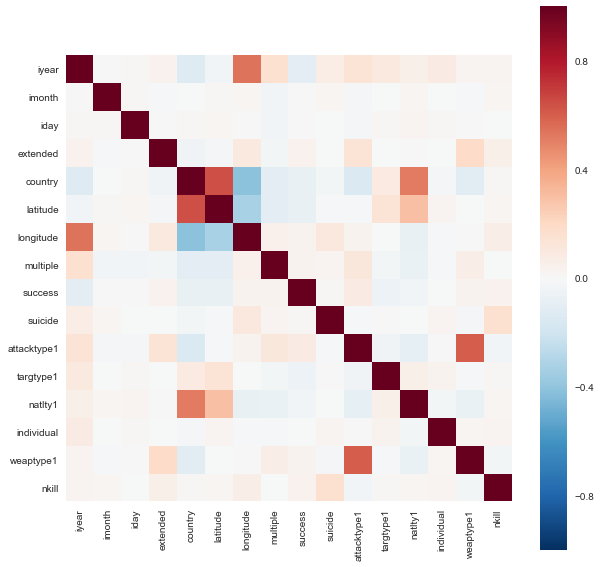

In [58]:
corrmat = df_Europe.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=1, square=True);
plt.show()

There are some obvious higher correlations, like between **nationality** & **country** and **attacktype** & **weapontype**. Otherwise variables are fairly non-correlated, which looks good for the model; we don't have closely related variables basically just capturing the same thing.<br><br>
Going forward, we will further drop string objects from the data with the extension '_txt'. These variables will still be found as *numerical* values in the data, though. 

### Train Test split 
Now we need to split our data to a train set (80%) and test set (20%).  The variable we're trying to predict is **success**; what determines whether a terrorist attack will be succesful or not. <br>
The **random_state** -variable of the split is set to a fixed number, here the somewhat arbitrary '42', thereby keeping the random number generator constant. This way we will always be getting the same split and avoid the risk of introducing sampling bias.

In [59]:
#from sklearn.model_selection import train_test_split
X = df_Europe.drop(['iyear', 'success','country', 'country_txt', 'attacktype1_txt','targtype1_txt','natlty1', 'natlty1_txt', 'weaptype1_txt'], axis=1)
y = df_Europe['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Next, we need to separate the *features* from the *target* that we're trying to build a Decision Tree for (and later a Random Forest).<br>
We skip variable **'iyear'**, since past years cannot reoccur and have therefore no impact on the prediction. Also, we skip variable **'country'**, since it must fit together with the variables **'longitude'** and **'latitude'** anyway and does not bring additional value on its own.


In [60]:
features = [ 'imonth', 'iday', 'extended',  'latitude', 'longitude', 'multiple','suicide','attacktype1',
            'targtype1', 'individual', 'weaptype1', 'nkill']

### Performance Measures for Prediction and Evaluation
We use a Confusion Matrix first on a Decision Tree then on a Random Forest to evaluate the accuracy of each method.<br>

|       |                 |
|-----------------------|:--------------------:|
| True Negatives (TN)  |  False Positives (FP) |
| False Negatives (FN)  |  True Positives (TP) |
<br>
In a perfect model both **False Positives** and **False Negatives** in the matrix would be zero!<br><br>
In our model for predicting the succesfulness of terrorist attacks the interpretation is as follows:<br><br>
- TN = The model predicts correctly a non-succesful attack
- TP = The model predicts correctly a succesful attack
- FN = The model predicts a succesful attack wrongfully to be non-succesful
- FP = The model predicts a non-succesful attack wrongfully to be succesful<br><br>

The **Precision**(=accuracy of the positive predictions), **Recall**(=ratio of positive instances correctly detected by the classifier) and **f1-score** may be more concise metrics, however.

- **Precision** for 'success' = TP/(TP+FP) <br>
- **Precision** for *not* 'success' = TN/(TN+FN) <br><br>
- **Recall** for 'success' = TP/(TP+FN)  <br>
- **Recall** for *not* 'success' = TN/(TN+FP)  <br><br>
- The **f1-score** is the harmonic mean of Precision and Recall.


### Decision Tree - with max node depth of 3

Now we will construct the actual Decision Tree. Just to make the first try more visual we stick to a max depth of 3 for the decision nodes.

In [61]:
y = df_Europe['success'] #this is what we're trying to predict!
X = df_Europe[features]
dtc = tree.DecisionTreeClassifier(max_depth=3) 
dtc = dtc.fit(X_train,y_train)
#Two lines of code to create the classifier!!

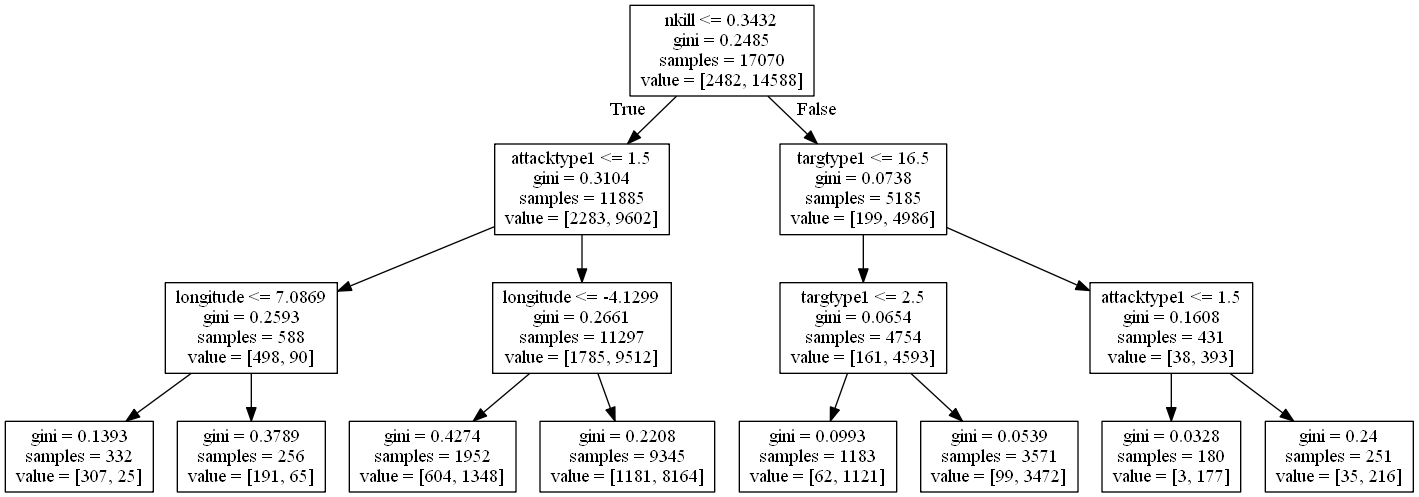

In [62]:
dot_data = StringIO()  
tree.export_graphviz(dtc, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

And a look at the results:

In [63]:
dtc_pred = dtc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,dtc_pred))

             precision    recall  f1-score   support

          0       0.83      0.19      0.31       588
          1       0.89      0.99      0.94      3680

avg / total       0.88      0.88      0.85      4268



In [64]:
print(confusion_matrix(y_test,dtc_pred))

[[ 113  475]
 [  23 3657]]


###  Decision Tree - no max node depth

In [65]:
y = df_Europe['success'] 
X = df_Europe[features]
dtc = tree.DecisionTreeClassifier() 
dtc = dtc.fit(X_train,y_train)

The graphical Decision Tree would be too complex to be presented visually so we go with numerical results only.

In [66]:
dtc_pred = dtc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,dtc_pred))

             precision    recall  f1-score   support

          0       0.43      0.50      0.46       588
          1       0.92      0.89      0.91      3680

avg / total       0.85      0.84      0.84      4268



In [67]:
print(confusion_matrix(y_test,dtc_pred))

[[ 292  296]
 [ 387 3293]]


**True Negatives** have more than doubled, **False Positives** have decreased by a third and **False Negatives** are much higher.<br>
Since Decision Trees can suffer from overfitting, we will continue with Random Forests to see if we can improve the model.

### Random Forest
After trying with various *n_estimators*, i.e. "number of trees in the forest", with 10 being the default, the optimal **confusion_matrix** was received with (n_estimators=400). Increasing the number to up to 1000 did not improve the outcome, but slightly to the contrary. 

In [68]:
rfc = RandomForestClassifier(n_estimators=400) 
rfc = rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [69]:
#rfc_pred = rfc.predict(X_test)

In [70]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.73      0.43      0.54       588
          1       0.91      0.97      0.94      3680

avg / total       0.89      0.90      0.89      4268



In [71]:
print(confusion_matrix(y_test,rfc_pred))

[[ 250  338]
 [  92 3588]]


Overall, comparing the Confusion Matrix of the latter Decision Tree with the Random Forest, the difference is not very striking, except for the clear reduction in False Negatives. The Classification Report does show a clearer improvement, though. We decide to go with the Random Forest model!

### Checking for feature importance
We can also check for the relative importance of each attribute for making accurate predictions. With this information, we could drop some of the less useful features, should we decide to fine-tune the model further.

In [72]:
for name, score in zip(X_train[features], rfc.feature_importances_):
    print(name, score)

imonth 0.113801261555
iday 0.168167249611
extended 0.00224402962351
latitude 0.173070223189
longitude 0.181545185025
multiple 0.01165144256
suicide 0.00120812759507
attacktype1 0.105321137451
targtype1 0.110169008075
individual 0.00204095052907
weaptype1 0.0414702061907
nkill 0.0893111785964


We sort the results and take a look at them graphically:

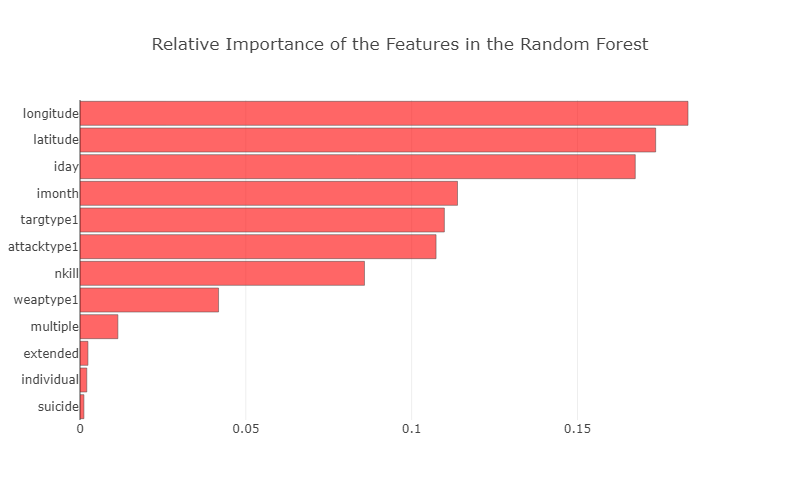

In [81]:
data = go.Bar(
    y=['suicide', 'individual', 'extended', 'multiple', 'weaptype1', 'nkill', 'attacktype1','targtype1', 
       'imonth',  'iday', 'latitude',  'longitude'],
    x=[0.001182,0.002047,0.002392,0.011422,0.041777,0.085776,0.107362,0.109867,0.113829,0.167432,0.173583,0.18333],   
    orientation = 'h',
    marker = dict(color = 'rgba(255,0,0, 0.6)', line = dict(width = 0.5)))

data = [data]
layout = go.Layout(title = 'Relative Importance of the Features in the Random Forest',
    barmode='group', bargap=0.1, width=800,height=500,)

fig = go.Figure(data=data, layout=layout)
#iplot(fig)
Image("C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/data_sets/Global Terrorism Database/Charts/FeatureImportance.png")

Looks like dropping the features **extended**, **individual** and **suicide** might be considered. 

### Checking the outcome with inserted data
Now we finally have a model using which we can actually predict whether an attack is expected to succeed or fail.<br>
By typing in the twelve variables the model gives the predicted outcome.

In [74]:
succeed_or_fail = RandomForestClassifier(n_estimators=400) 
succeed_or_fail = rfc.fit(X, y) #clf

month = 12           # in which month would the attack take place
day = 23             # on which day of the month would the attack take place
extended = 0         # 1=yes, 0=no
latitude = 48.8566
longitude = 2.3522
multiple = 0         # attack is part of a multiple incident (1), or not (0)
suicide = 0          # suicide attack (1) or not (0)
attackType = 3       # 9 categories
targetType = 7       # 22 categories
individual = 0       # known group/organization (1) or not (0)
weaponType = 6       # 13 categories
nkill = 0            # number of total casualties from the attack

outcome = (succeed_or_fail.predict([[(month),(day),(extended),(latitude),(longitude),(multiple),(suicide),(attackType),(targetType),(individual),(weaponType),(nkill)]])) 
if outcome == 1:
    print(outcome)
    print("The attack based on these features would be succesful.")
elif outcome == 0:
    print(outcome)
    print("The attack based on these features would NOT be succesful.")


[0]
The attack based on these features would NOT be succesful.


### Conclusions

We decided to narrow the data down to cover only attacks on European soil, i.e. 21.000+ incidents during 1970-2016. Maybe a more accurate model would have been achieved by using the global data, 170.000+ incidents. However, by using global data we might loose some of the model's predicting power for Europe due to the large variance in the data, especially for longitude and latitude.<br><br>
Perhaps a more interesting analysis would be whether an attack is expected to lead to civilian casualties. The data for this variable, *total number of fatalities including all victims and attackers*, had unfortunately quite many gaps in it due to the uncertain number of terrrorists killed.<br><br>
The model could be fine-tuned - and simplified - further by skipping the 4 least important features; **multiple, extended, individual, suicide**. However, for now, we conclude the analysis here.